In [2]:
%load_ext google.cloud.bigquery
%matplotlib inline
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [39]:
sql = '''
SELECT *  FROM `eth-tokens.alldata.toy` LIMIT 20000
'''

df = client.query(sql).to_dataframe()
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,active_months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent
0,0xad391f88dfd96ce4c73accf2556ebbddb74e85f1,0,2,0,0,0.0,0.0,0.199299999,0.09965,39.606889,19.803444,1,0.0,2.0,0,0.0,0.199299999,39.606889,0,0
1,0x0751267744307eec7d34a0e6896cf59336cbc8fc,0,2,0,0,0.0,0.0,200.003,100.0015,41940.629100,20970.314550,1,0.0,2.0,0,0.0,200.003,41940.629100,0,0
2,0x97f602f85bfa67c4e4bc02965c55703bb6323b1d,0,2,0,0,0.0,0.0,0.022259136,0.011129568,4.474532,2.237266,1,0.0,2.0,0,0.0,0.022259136,4.474532,0,0
3,0x61def97d552b046ccd1f2d2cdef848524d7a8399,0,2,0,0,0.0,0.0,0.00084,0.00042,0.177912,0.088956,1,0.0,2.0,0,0.0,0.00084,0.177912,0,0
4,0x896a69e834e72cf33f07a83137835a303a0e2d97,0,2,0,0,0.0,0.0,4.93814,2.46907,1046.391866,523.195933,1,0.0,2.0,0,0.0,4.93814,1046.391866,0,0


In [40]:
data = df.iloc[:,1:]

In [52]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=6))])

results = pipe.fit_transform(data)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.2)

db.fit(results)

print(db.components_.shape)

labels = np.unique(db.labels_)
indices = db.core_sample_indices_

sample, outliers = results[indices], np.delete(results, indices, axis=0)
s_labels, o_labels = db.labels_[indices], np.delete(db.labels_, indices, axis=0)


(18646, 6)


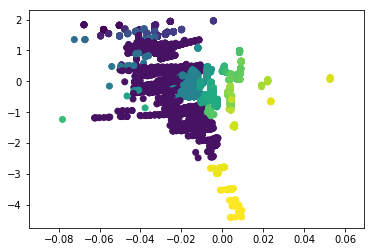

In [59]:

# plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,3], sample[:,4], c= s_labels)

# plt.xlim(-1,30)
# plt.ylim(-1,20)

(-1, 1)

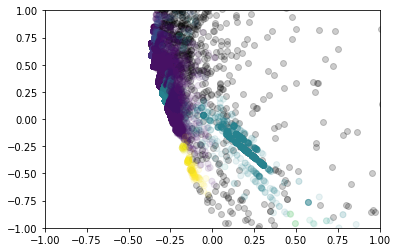

In [60]:

plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,0], sample[:,1], c= s_labels, alpha= .1)

plt.xlim(-1,1)
plt.ylim(-1,1)

In [55]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])